# 랜덤포레스트 정의

In [1]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

# 랜덤포레스트 실습

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
# 스케일링
scaler = MinMaxScaler()
scaler.fit(train[['fixed acidity']])
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])

# 인코딩
encoder = OneHotEncoder()
encoder.fit(train[['type']])
onehot = encoder.transform(train[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
train = pd.concat([train, onehot], axis=1)
train = train.drop(columns=['type'])

In [4]:
# 실습

# x 변수에 train에 quality 컬럼을 제거한 데이터프레임 저장
x = train.drop(columns=['quality'])

# y 변수에 quality 저장(정답)
y = train['quality']

# 학습
random_forest.fit(x, y)

RandomForestClassifier()

# 교차검증

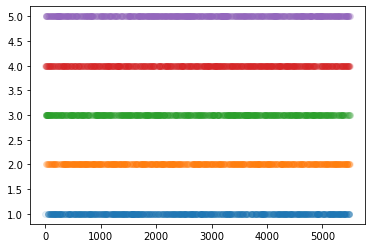

In [5]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

kf = KFold(n_splits=5, shuffle=True, random_state=None)

i = 1
for train_idx, valid_idx in kf.split(train):
    train_data = train.iloc[train_idx]
    valid_data = train.iloc[valid_idx]
    plt.scatter(valid_idx, [i for _ in range(len(valid_idx))], alpha=0.1)
    i += 1

plt.show()

# 교차검증 실습

In [6]:
import numpy as np
from sklearn.metrics import accuracy_score

# train 데이터
x = train.drop(columns=['index', 'quality'])
y = train['quality']

# test 데이터 전처리
test['Scaled fixed acidity'] = scaler.transform(test[['fixed acidity']])
onehot = encoder.transform(test[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
test = pd.concat([test, onehot], axis=1)
test = test.drop(columns=['type'])

In [13]:
# 모델 생성
model = RandomForestClassifier(random_state=None)
valid_scores = []
test_predictions = []

# trainset, validset 나누고 훈련
i=1
for train_idx, valid_idx in kf.split(x, y):
    x_tr = x.iloc[train_idx]
    y_tr = y.iloc[train_idx]
    x_val = x.iloc[valid_idx]
    y_val = y.iloc[valid_idx]

    # 나뉜 데이터셋으로 훈련
    model.fit(x_tr, y_tr)

    # 결과 저장
    valid_prediction = model.predict(x_val)

    # validation score
    score = accuracy_score(y_val, valid_prediction)
    valid_scores.append(score)
    print('valid score for dataset %01d: '%i, score)

    # 모델 테스트
    test_prediction = model.predict(test.drop(columns=['index']))
    test_predictions.append(test_prediction)
    
# 평균 validation score
print('mean validation score: ', np.mean(valid_scores))

valid score for dataset 1:  0.6827272727272727
valid score for dataset 1:  0.6954545454545454
valid score for dataset 1:  0.6642402183803457
valid score for dataset 1:  0.6624203821656051
valid score for dataset 1:  0.6669699727024567
mean validation score:  0.6743624782860451


In [15]:
# 테스트 결과들을 데이터프레임으로 변환
test_predictions = pd.DataFrame(test_predictions)

test_prediction = test_predictions.values[0]

# 결과 저장
sample_submission = pd.read_csv('./data/sample_submission.csv')
sample_submission['quality'] = test_prediction
sample_submission.to_csv('./data/submission_KFOLD.csv', index=False)